   
   ## Лабораторная работа №4. 
   Реализация приложения по распознаванию номеров домов.
   #### Данные: 
   Набор изображений из Google Street View с изображениями номеров домов, содержащий 10 классов, соответствующих цифрам от 0 до 9.
   #### Ход выполнения:



###### Задание 1.
Реализуйте глубокую нейронную сеть (полносвязную или сверточную) и обучите ее на синтетических данных (например, наборы MNIST (http://yann.lecun.com/exdb/mnist/) или notMNIST).

Загрузим набор данных MNIST, состоящий из 60000 тренировочных и 10000 тестовых картинок размером 28х28.

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Train size: ", x_train.shape)
print("Test size: ", x_test.shape)

Train size:  (60000, 28, 28)
Test size:  (10000, 28, 28)


Отобразим пример картинки.

5


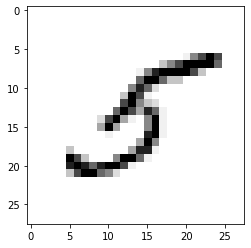

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

Отобразим пример маркера картинки.

In [3]:
print("Sample labels:", y_train[image_index])

Sample labels: 5


Разделим тренировочные данные на тренировочную и валидационную. Нормализуем данные и подготовим под формат сети.

In [4]:
from sklearn.model_selection import train_test_split

img_rows, img_cols = 28, 28

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32') / 255.0
x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1).astype('float32') / 255.0

print("Train: ", x_train.shape)
print("Validation: ", x_valid.shape)

Train:  (48000, 28, 28, 1)
Validation:  (12000, 28, 28, 1)


Используем сверточную нейронную сеть с 2 слоями и полносвязанный слой для вывода результата.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

num_classes = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Обучим сеть на наборе данных и сохраним результат модели.

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 63s - loss: 0.2662 - accuracy: 0.9203 - val_loss: 0.0654 - val_accuracy: 0.9800
Epoch 2/10
48000/48000 - 67s - loss: 0.0902 - accuracy: 0.9735 - val_loss: 0.0471 - val_accuracy: 0.9868
Epoch 3/10
48000/48000 - 71s - loss: 0.0712 - accuracy: 0.9790 - val_loss: 0.0454 - val_accuracy: 0.9870
Epoch 4/10
48000/48000 - 70s - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 5/10
48000/48000 - 72s - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0364 - val_accuracy: 0.9884
Epoch 6/10
48000/48000 - 72s - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0366 - val_accuracy: 0.9890
Epoch 7/10
48000/48000 - 72s - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0329 - val_accuracy: 0.9898
Epoch 8/10
48000/48000 - 73s - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0357 - val_accuracy: 0.9898
Epoch 9/10
48000/48000 - 75s - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0354 - val_accuracy: 0.9909
Epoch

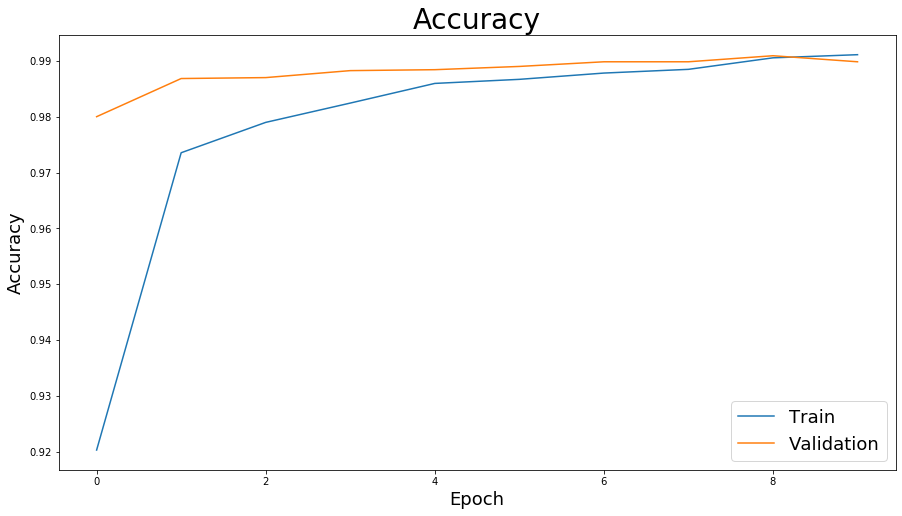

In [6]:
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_valid, y_valid))

def plot_history(history):
    plt.figure(figsize=(15, 8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Accuracy", fontsize=28)
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel('Accuracy', fontsize=18)
    plt.legend(['Train','Validation'], fontsize=18)
    plt.show()

    
plot_history(history)   

Сеть показала результат точности в 99.27%.

Проверим результат сети на тестовых данных.

In [7]:
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32') / 255.0

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy = {0:.2f}%\nTest loss = {1:.2f}%'.format(test_accuracy*100.0, test_loss*100.0))

10000/1 - 4s - loss: 0.0152 - accuracy: 0.9909
Test accuracy = 99.09%
Test loss = 3.05%


Actual:  7 Prediction:  7


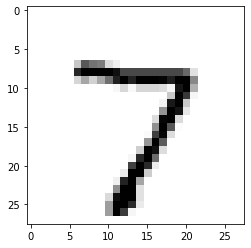

Actual:  2 Prediction:  2


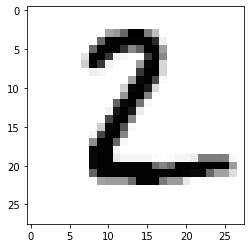

Actual:  1 Prediction:  1


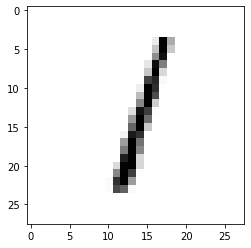

Actual:  0 Prediction:  0


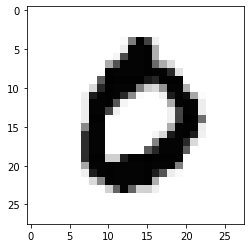

Actual:  4 Prediction:  4


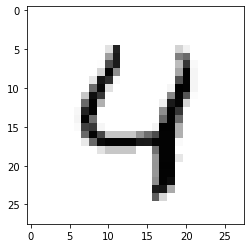

In [8]:
prediction = model.predict(x_test)

for i, test_image in enumerate(x_test[0:5]):
    print("Actual: ", y_test[i], "Prediction: ", prediction[i].argmax())
    plt.imshow(test_image.squeeze(), cmap='Greys')
    plt.show()

###### Задание 2.
После уточнения модели на синтетических данных попробуйте обучить ее на реальных данных (набор Google Street View). Что изменилось в модели?

In [70]:
import scipy.io as sio

def load_data(path):
    data = sio.loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('./input/train_32x32.mat')
X_test, y_test = load_data('./input//test_32x32.mat')

classes = [0,1,2,3,4,5,6,7,8,9]
nb_classes = 10

print(X_train.shape, X_test.shape)

(32, 32, 3, 73257) (32, 32, 3, 26032)


In [71]:
import numpy as np

X_train = X_train.transpose((3,0,1,2))
X_test = X_test.transpose((3,0,1,2))
y_train = y_train[:,0]
y_test = y_test[:,0]

print("Train Set", X_train.shape)
print("Test Set", X_test.shape)

y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
print(np.unique(y_train))

Train Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]


In [72]:
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=7)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

print("Y Train: ", y_train.shape)
print("Y Test: ", y_test.shape)

Y Train:  (65931,)
Y Test:  (26032,)


In [73]:
import tensorflow as tf

X_test = tf.image.rgb_to_grayscale(X_test, name=None)
print("Test Set", X_test.shape)


Test Set (26032, 32, 32, 1)


Label 52377 is 1


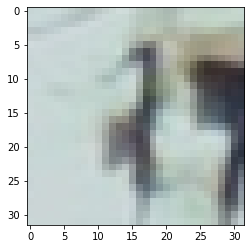

In [74]:
i = np.random.randint(1, len(X_train))
print("Label %d is" % i, y_train[i])
plt.imshow(X_train[i])
plt.show()

In [75]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

x_test_tt = np.asarray([img_to_array(array_to_img(im, scale=True).resize((img_rows, img_cols))) for im in X_test])
score = model.evaluate(x_test_tt, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 568.9962844707956
Test accuracy: 0.24861708


Actual:  5 Prediction:  7


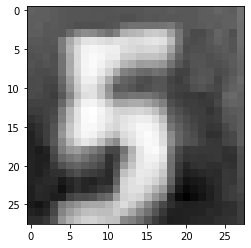

Actual:  2 Prediction:  2


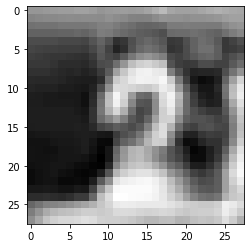

Actual:  1 Prediction:  2


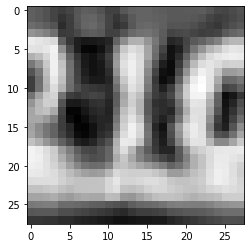

Actual:  0 Prediction:  8


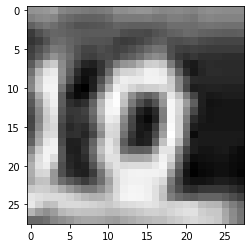

Actual:  6 Prediction:  2


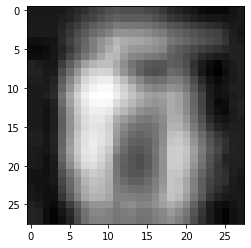

In [76]:
prediction = model.predict(x_test_tt)

for i, test_image in enumerate(x_test_tt[0:5]):
    print("Actual: ", y_test[i], "Prediction: ", prediction[i].argmax())
    plt.imshow(test_image.squeeze(), cmap='Greys')
    plt.show()